## **IRIS spectral analysis tutorial for raster data** ##
This is written by Dr. Sargam Mulay, University of Glasgow, UK

In [2]:
# importing relevant modules and packages

from os.path import dirname, join as pjoin
import scipy.io as sio

# reading the IDL save files
from scipy.io import readsav

# reading the time array 
import pandas as pd

from matplotlib.ticker import FuncFormatter

# time axis in HH:MM:SS format
import matplotlib.dates as mdates
from datetime import datetime, timedelta

from matplotlib.ticker import FuncFormatter

from scipy.optimize import curve_fit

from matplotlib.ticker import AutoMinorLocator


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle as rect
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator
import matplotlib.dates as dates

import numpy as np
import numpy.ma as ma
import os, time

import astropy.units as u
from astropy.coordinates import SpectralCoord
from astropy.io import fits
from astropy.visualization import (time_support, MinMaxInterval, SqrtStretch, ImageNormalize)
from astropy.wcs import WCS
from astropy.modeling import models

import requests
import inspect
from datetime import datetime, timedelta

import scipy as scipy
from scipy import stats
from scipy import optimize
from scipy.constants import c
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy import interpolate

#from irispy.io import read_spectrograph_lvl2
#from irispy.io import read_sji_lvl2
#from irispy.utils import image_clipping
#from irispy.utils.utils import _download_data

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

from lmfit.models import GaussianModel, ConstantModel
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

%matplotlib inline

# function to convert to superscript 
def get_super(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s)) 
    return x.translate(res) 
# display superscipt 
# print(get_super('GeeksforGeeks')) #ᴳᵉᵉᵏˢᶠᵒʳᴳᵉᵉᵏˢ 


# function to convert to subscript 
def get_sub(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s)) 
    return x.translate(res) 
  
# display subscript 
#print('H{}SO{}'.format(get_sub('2'),get_sub('4'))) #H₂SO₄ 

## Angstrom symbol in print command
# print('wavelength \u00c5')

# subscript for H2
# H\N{SUBSCRIPT TWO}

#plt.style.use('untitled1.txt')

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['image.origin'] = 'lower' # this is important to convert the Y-axis ticks - starting at the bottom left
plt.rcParams['image.cmap'] = 'viridis'



## **IRIS raster data is available at** ##
- https://www.lmsal.com/hek/hcr?cmd=view-event&event-id=ivo%3A%2F%2Fsot.lmsal.com%2FVOEvent%23VOEvent_IRIS_20241003_072127_4204700237_2024-10-03T07%3A21%3A272024-10-03T07%3A21%3A27.xml



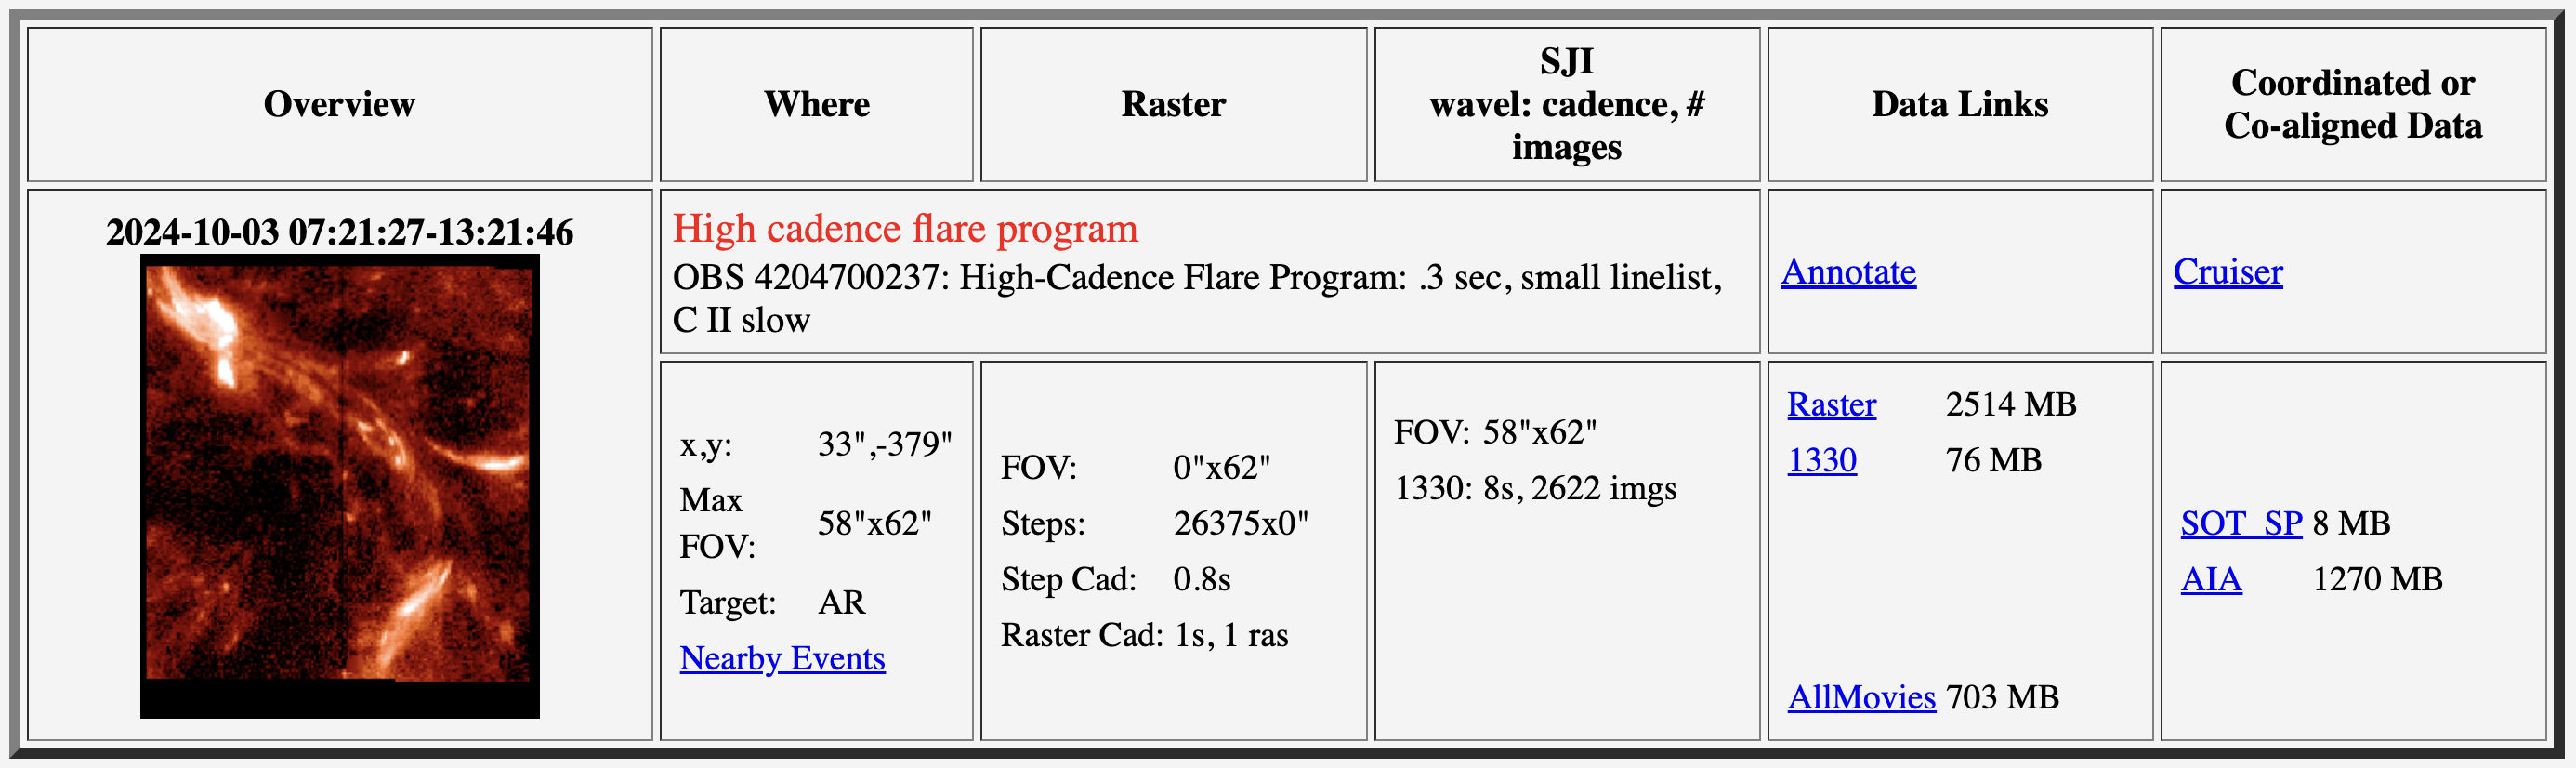

In [3]:
from IPython.display import Image
Image(filename='/Users/sargammulay/Documents/Research/Transient_ionisation/flare_details.png')

## **IRIS FTP data download** ##
- https://umbra.nascom.nasa.gov/iris/

## **IRISpy tutorial** ##
- https://iris.lmsal.com/itn41/reading_iris.html 
- https://github.com/tiagopereira/iris_tutorials/blob/master/notebooks/IRIS10.ipynb 
- https://www2.mps.mpg.de/meetings/iris9/abs/tut%202.pdf 
- https://github.com/DanRyanIrish/irispy_tutorials/blob/master/irispy_demo_iris9/irispy_demo_iris9.ipynb 
- https://github.com/abit2/irispy/tree/master/irispy 
- https://arxiv.org/pdf/2011.12139.pdf 

## **irispy-lmsal tutorial** ##
- https://iris.lmsal.com/itn45/chapter2.html#a-quick-look-at-iris-level-2-data




## **Reading in an IRIS raster file** ##

In [4]:
data_dir = pjoin('/Users/sargammulay/Desktop/Flare_Oscillation/python_code/Time_delay_analysis/')
o4_1401_file_name = pjoin(data_dir, 'ltcurve_raster_dummy_o4_1401.save')

In [5]:
def fits_reader(path):
    spectra = fits.open(path)
    header = spectra[0].header
    return spectra, header

In [6]:
sp, hdr = fits_reader(path=r'/Users/sargammulay/Documents/Research/Transient_ionisation/flare_data/iris_l2_20241003_072127_4204700237_raster_t000_r00000.fits')


In [7]:
# Check what kind of raster it is (should be Very Very large dense 64-step raster)

print('IRIS observation date - ', hdr['DATE_OBS'])
print('IRIS observation information - ', hdr['OBS_DESC'])


IRIS observation date -  2024-10-03T07:21:27.528
IRIS observation information -  High-Cadence Flare Program: .3 sec, small linelist, C II slow


## **Check Header information** ##

#### Keyword meanings available for download at https://iris.lmsal.com/itn26/iris_level2.html ####
#### https://www.lmsal.com/iris_science/doc?cmd=dcur&proj_num=IS0211&file_type=pdf ####



IRIS has multiple headers of which the first header (should be access with index zero) is a long header that contains information of all the windows observed

In [8]:
# Check the big header

iris_big_header = sp[0].header
iris_big_header

SIMPLE  =                    T / Written by IDL:  Fri Jun 13 16:54:29 2025      
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    0 / Number of data axes                            
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2025-06-13'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'IRIS    '           /                                                
INSTRUME= 'SPEC    '           /                                                
DATA_LEV=              2.00000 /                                                
LVL_NUM =              2.00000 /                                                
VER_RF2 = 'L12-2019-08-08'     /                                                
DATE_RF2= '2025-06-12T17:59:

In [9]:
Num_win = iris_big_header['NWIN']
print('No. of windows = ', Num_win)

FOV_X = iris_big_header['FOVX']
print('Field-of-view in X-direction (arcsec) = ', FOV_X)

FOV_Y = iris_big_header['FOVY']
print('Field-of-view in Y-direction (arcsec) = ', FOV_Y)

N_EXP = iris_big_header['NEXP']
print('No. of exposures = ', N_EXP)

EXP_TIME = iris_big_header['EXPTIME']
print('Exposure time = ', EXP_TIME)


No. of windows =  4
Field-of-view in X-direction (arcsec) =  0.3327
Field-of-view in Y-direction (arcsec) =  67.8708
No. of exposures =  26375
Exposure time =  0.295439


## **Examine how many windows are available in the raster scan** ##

This observation has three windows.


In [10]:
Num_win = iris_big_header['NWIN']
print('No. of windows in the raster file = ', Num_win)
print('')
print('Window Name       : wave start - wave end\n')
for i in range(hdr['NWIN']):
 win = str(i + 1)
 print('{0}. {1:15}: {2:.2f} - {3:.2f} Å'
 ''.format(win, hdr['TDESC' + win], hdr['TWMIN' + win], hdr['TWMAX' + win]))

No. of windows in the raster file =  4

Window Name       : wave start - wave end

1. C II 1336      : 1332.65 - 1336.96 Å
2. Si IV 1403     : 1400.21 - 1406.47 Å
3. 2814           : 2813.01 - 2816.42 Å
4. Mg II k 2796   : 2793.46 - 2800.13 Å


## **Information about window 2 - Si IV 1402.77 Å** ##

In [11]:
# We are accesing information from iris_big_header i.e. from sp[0].header
# The wavelength information from each window has been stored as TWMIN1, TWMAX1 - the number indicates the window number

print('Win 2 min_wavelength =', iris_big_header['TWMIN2'], 'Å')
print('Win 2 max_wavelength =', iris_big_header['TWMAX2'], 'Å')
print('')
print('')

print('We are accesing information from other available headers for each window i.e. from sp[2].header')
print('')
print('Header for window 2 = Si IV 1403 Å')

win2_si4_header = sp[2].header
win2_si4_header


Win 2 min_wavelength = 1400.20822787 Å
Win 2 max_wavelength = 1406.46646787 Å


We are accesing information from other available headers for each window i.e. from sp[2].header

Header for window 2 = Si IV 1403 Å


XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  247 /                                                
NAXIS2  =                  204 /                                                
NAXIS3  =                26375 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
BSCALE  =                 0.25 /                                                
BZERO   =                 7992 /                                                
CDELT1  =      0.0254399999976 /                                                
CDELT2  =             0.332700 /                                                
CDELT3  =        0.000000000

## **Check the size of the spectral data array** ##

In [12]:
win2_si4_sp_data = sp[2].data
print(win2_si4_sp_data.shape, '(time, pixel, wavelength)')

(26375, 204, 247) (time, pixel, wavelength)


Here NAXIS1=247 (wavelength), NAXIS2=204, (spatial y), and NAXIS3=4220 (time). Since arrays in Python are in C order, the dimension order will be reversed.

So the data shape will be in (time, pixel, wavelength) order.

## **Access individual dimension from the spectral data** ##
This is useful syntax to access each dimension separately and check the number of elements in each dimension. This could be stored as an individual variables.

In [13]:
win2_sp_N_slit = win2_si4_sp_data.shape[0]
print('No. of slit positions (or exposures) along X-axis = ', win2_sp_N_slit)
print('')

win2_sp_N_Ypix = win2_si4_sp_data.shape[1]
print('No. of pixels along Y-axis = ', win2_sp_N_Ypix)
print('')

win2_sp_N_wave = win2_si4_sp_data.shape[2]
print('No. of wavelengths = ', win2_sp_N_wave)
print('')


No. of slit positions (or exposures) along X-axis =  26375

No. of pixels along Y-axis =  204

No. of wavelengths =  247



## **Creating wavelength array for window 2 = Si IV using WCS routines - Method 1** ##

In [14]:
#wcs1 = WCS(win1_c2_header) # wcs1 = WCS(sp[1].header)
#print('wcs1 =',wcs1)

#m_to_angstrom = 1e10 # meter to Angstrom conversion factor
#win1_n_wavelength = win1_c2_sp_data.shape[2] # nwave1 = sp[1].data.shape[2]
#print('Win 1 size of wavelength array = ', win1_n_wavelength)
#print('')
#win1_c2_wavelength_WCS = wcs1.all_pix2world(np.arange(win1_n_wavelength), [0.], [0.], 0)[0] * m_to_angstrom
#print(win1_c2_wavelength_WCS)

## **Creating wavelength array for window 2  = Si IV from header info - Method 2** ##

If the WCS syntax in above cell doesn't work then you can create wavelength array using the following syntax.

In [15]:
# Here win1_header = sp[1].header

win2_si4_wavelength = (np.arange(0, win2_si4_header['NAXIS1']) - win2_si4_header['CRPIX1']+1)*win2_si4_header['CDELT1'] + win2_si4_header['CRVAL1']
win2_si4_wavelength

array([1400.20822787, 1400.23366787, 1400.25910787, 1400.28454787,
       1400.30998787, 1400.33542787, 1400.36086787, 1400.38630787,
       1400.41174787, 1400.43718787, 1400.46262787, 1400.48806787,
       1400.51350787, 1400.53894787, 1400.56438787, 1400.58982787,
       1400.61526787, 1400.64070787, 1400.66614787, 1400.69158787,
       1400.71702787, 1400.74246787, 1400.76790787, 1400.79334787,
       1400.81878787, 1400.84422787, 1400.86966787, 1400.89510787,
       1400.92054787, 1400.94598787, 1400.97142787, 1400.99686787,
       1401.02230787, 1401.04774787, 1401.07318787, 1401.09862787,
       1401.12406787, 1401.14950787, 1401.17494787, 1401.20038787,
       1401.22582787, 1401.25126787, 1401.27670787, 1401.30214787,
       1401.32758787, 1401.35302787, 1401.37846787, 1401.40390787,
       1401.42934787, 1401.45478787, 1401.48022787, 1401.50566787,
       1401.53110787, 1401.55654787, 1401.58198787, 1401.60742787,
       1401.63286787, 1401.65830787, 1401.68374787, 1401.70918

## **Creating wavelength array for window 2 = Si IV - Method 3** ## 

In [16]:
# Here iris_big_header = sp[0].header

def get_wavelengths(data, hdr): # for plots
    nwave = win2_si4_sp_data.shape[2]
    min_wl = iris_big_header['TWMIN2'] # 0th spectral window
    max_wl = iris_big_header['TWMAX2']

    interval = (max_wl-min_wl)/nwave
    wavelengths = np.arange(min_wl, max_wl, interval)
    return wavelengths

In [17]:
win2_si4_sp_wavelength = get_wavelengths(win2_si4_sp_data, hdr)
print('wavelength array dimention = ', win2_si4_sp_wavelength.shape)
print(win2_si4_sp_wavelength)

wavelength array dimention =  (247,)
[1400.20822787 1400.23356487 1400.25890188 1400.28423888 1400.30957589
 1400.33491289 1400.36024989 1400.3855869  1400.4109239  1400.43626091
 1400.46159791 1400.48693491 1400.51227192 1400.53760892 1400.56294593
 1400.58828293 1400.61361993 1400.63895694 1400.66429394 1400.68963095
 1400.71496795 1400.74030496 1400.76564196 1400.79097896 1400.81631597
 1400.84165297 1400.86698998 1400.89232698 1400.91766398 1400.94300099
 1400.96833799 1400.993675   1401.019012   1401.044349   1401.06968601
 1401.09502301 1401.12036002 1401.14569702 1401.17103402 1401.19637103
 1401.22170803 1401.24704504 1401.27238204 1401.29771904 1401.32305605
 1401.34839305 1401.37373006 1401.39906706 1401.42440406 1401.44974107
 1401.47507807 1401.50041508 1401.52575208 1401.55108908 1401.57642609
 1401.60176309 1401.6271001  1401.6524371  1401.6777741  1401.70311111
 1401.72844811 1401.75378512 1401.77912212 1401.80445913 1401.82979613
 1401.85513313 1401.88047014 1401.905807

## **Converting the X-axis slit numbers to time in UT** ##

In [18]:
time_diff = sp[-2].data[:, sp[-2].header['TIME']]
time_diff

array([2.6500000e-01, 1.1000000e+00, 1.9740000e+00, ..., 2.1615647e+04,
       2.1616505e+04, 2.1617255e+04], dtype='>f8')

In [19]:
time_diff = sp[-2].data[:, sp[-2].header['TIME']]
times = np.datetime64(hdr['DATE_OBS']) + time_diff * np.timedelta64(1, 's')

times

array(['2024-10-03T07:21:27.528', '2024-10-03T07:21:28.528',
       '2024-10-03T07:21:28.528', ..., '2024-10-03T13:21:42.528',
       '2024-10-03T13:21:43.528', '2024-10-03T13:21:44.528'],
      dtype='datetime64[ms]')

## **We need the following conversion for creating X-axis = time (UT) in spectral image** ## 

In [20]:
times_num = dates.date2num(times.astype(datetime))
times_num

array([19999.30656861, 19999.30658019, 19999.30658019, ...,
       19999.55674222, 19999.5567538 , 19999.55676537])

## **Y-pixels along the slit - pixel to arcsec conversion - Method 1** ##

In [21]:
ax_arcsec = np.arange(0, sp[2].header['NAXIS2'])*sp[2].header['CDELT2']
print(ax_arcsec)

print(sp[1].header['NAXIS2'])
print('CDELT1 - Image scale in the CCD x direction = ', sp[2].header['CDELT1'])
print('CDELT2 - Image scale in the CCD y direction = ', sp[2].header['CDELT2'])
print('CDELT3 - Slit width for FUV, NUV; level 2: image scale in z direction (raster: scale in solar x-direction) = ', sp[2].header['CDELT3'])
print('')
print('CRVAL1 - raster: Wavelength = ', sp[2].header['CRVAL1'])
print('CRVAL2 - Solar_y (YCEN in arcsec)= ', sp[2].header['CRVAL2'])
print('CRVAL3 - raster: Solar_x (XCEN  in arcsec)= ', sp[2].header['CRVAL3'])
print('CRPIX1 - Pixel in 1st dimension for which CRVAL1 is defined = ', sp[2].header['CRPIX1'])
print('CRPIX2 - Pixel in 2nd dimension for which CRVAL2 is defined = ', sp[2].header['CRPIX2'])
print('CRPIX3 - Pixel in 3rd dimension for which CRVAL3 is defined = ', sp[2].header['CRPIX3'])
print('')

FOV_X = iris_big_header['FOVX']
print('Field-of-view in X-direction (arcsec) = ', FOV_X)
print('')

FOV_Y = iris_big_header['FOVY']
print('Field-of-view in Y-direction (arcsec) = ', FOV_Y)

sp[2].data.shape
print('')

print(win2_si4_sp_data.shape, '(time, pixel, wavelength)')


[ 0.      0.3327  0.6654  0.9981  1.3308  1.6635  1.9962  2.3289  2.6616
  2.9943  3.327   3.6597  3.9924  4.3251  4.6578  4.9905  5.3232  5.6559
  5.9886  6.3213  6.654   6.9867  7.3194  7.6521  7.9848  8.3175  8.6502
  8.9829  9.3156  9.6483  9.981  10.3137 10.6464 10.9791 11.3118 11.6445
 11.9772 12.3099 12.6426 12.9753 13.308  13.6407 13.9734 14.3061 14.6388
 14.9715 15.3042 15.6369 15.9696 16.3023 16.635  16.9677 17.3004 17.6331
 17.9658 18.2985 18.6312 18.9639 19.2966 19.6293 19.962  20.2947 20.6274
 20.9601 21.2928 21.6255 21.9582 22.2909 22.6236 22.9563 23.289  23.6217
 23.9544 24.2871 24.6198 24.9525 25.2852 25.6179 25.9506 26.2833 26.616
 26.9487 27.2814 27.6141 27.9468 28.2795 28.6122 28.9449 29.2776 29.6103
 29.943  30.2757 30.6084 30.9411 31.2738 31.6065 31.9392 32.2719 32.6046
 32.9373 33.27   33.6027 33.9354 34.2681 34.6008 34.9335 35.2662 35.5989
 35.9316 36.2643 36.597  36.9297 37.2624 37.5951 37.9278 38.2605 38.5932
 38.9259 39.2586 39.5913 39.924  40.2567 40.5894 40.

In [22]:
Ypix_arcsec = sp[2].header['CDELT2']
print('1-Ypix in arcsec = ', Ypix_arcsec)
print('No. of Y-pixels along the slit = ', sp[2].data.shape[1])
Y_FOV_arcsec = sp[2].header['CDELT2'] * sp[2].data.shape[1]
print('find the field-of-view covered in Y-direction along the slit in arcses = ', Y_FOV_arcsec)
print('Y-FOV should be same as the value given in the header sp[0].header[FOVY] = ', iris_big_header['FOVY'])
print('')
print('Find the Y-CEN in arcsec from the header sp[0].header[YCEN] = ',iris_big_header['YCEN'])
print('Y-CEN is same as the CRVAL2 - Solar_y (YCEN in arcsec) = ', sp[2].header['CRVAL2'])
print('')

half_YFOV = iris_big_header['FOVY'] / 2
print('divide Y-FOV in half = ', half_YFOV)
print('')

print('Get the value of the first Y-pix in arcsec = ')
first_Ypix_arcsec = iris_big_header['YCEN'] - half_YFOV
print('subtract half Y-FOV from the YCEN value = ', first_Ypix_arcsec)
print('')

print('Get the value of the last Y-pix in arcsec = ')
last_Ypix_arcsec = iris_big_header['YCEN'] + half_YFOV
print('add half Y-FOV to the YCEN value = ', last_Ypix_arcsec)
print('')

Y_arcsec = np.arange(first_Ypix_arcsec,last_Ypix_arcsec,Ypix_arcsec)
Y_arcsec.shape
print('create an Y-axis array in arcsec with first and last Y-axis arcsec value = ')
print('Y-arcsec = ',Y_arcsec)
print('')
print('Check the Y-arcsec array produce the correct arcsec values ')
print('No. of Y-pixels along the slit = ', sp[1].data.shape[1])
half_n_Ypix = sp[2].data.shape[1]/2
print('divide No. of Y-pixels along the slit in half = ', half_n_Ypix)
print('find the arcsec value for this index in Y_arcsec[index] = ', Y_arcsec[int(half_n_Ypix)])
print('Y_arcsec[index] = should match with sp[0].header[YCEN]', iris_big_header['YCEN'])
print('')


print('The above entire conversion could be done in one line')
print('yaxis=(np.arange(0, sp[2].header[NAXIS2])-sp[2].header[CRPIX2]+1)*sp[2].header[CDELT2]+sp[2].header[CRVAL2]')
yaxis_arcsec = (np.arange(0, sp[2].header['NAXIS2'])-sp[2].header['CRPIX2']+1)*sp[2].header['CDELT2']+sp[2].header['CRVAL2']
print('yaxis = ', yaxis_arcsec)

1-Ypix in arcsec =  0.3327
No. of Y-pixels along the slit =  204
find the field-of-view covered in Y-direction along the slit in arcses =  67.8708
Y-FOV should be same as the value given in the header sp[0].header[FOVY] =  67.8708

Find the Y-CEN in arcsec from the header sp[0].header[YCEN] =  -378.825
Y-CEN is same as the CRVAL2 - Solar_y (YCEN in arcsec) =  -378.825

divide Y-FOV in half =  33.9354

Get the value of the first Y-pix in arcsec = 
subtract half Y-FOV from the YCEN value =  -412.7604

Get the value of the last Y-pix in arcsec = 
add half Y-FOV to the YCEN value =  -344.8896

create an Y-axis array in arcsec with first and last Y-axis arcsec value = 
Y-arcsec =  [-412.7604 -412.4277 -412.095  -411.7623 -411.4296 -411.0969 -410.7642
 -410.4315 -410.0988 -409.7661 -409.4334 -409.1007 -408.768  -408.4353
 -408.1026 -407.7699 -407.4372 -407.1045 -406.7718 -406.4391 -406.1064
 -405.7737 -405.441  -405.1083 -404.7756 -404.4429 -404.1102 -403.7775
 -403.4448 -403.1121 -402.7794 

## **Y-pixels along the slit - pixel to arcsec conversion using WCS - Method 2** ##

In [23]:
#y_arcsec2 = WCS(sp[1].header).all_pix2world([0.], np.arange(sp[1].data.shape[1]), [0.], 0)[1] * 3600
#y_arcsec2

## **Check the index for Si IV 1402.77 Å wavelength** ##

In [24]:
# slice the data around the expected value, to avoid influence from other lines/background, around 2A seems good
win2_si4_1402 = 1402.77

# calculate the difference array
difference_array = np.absolute(win2_si4_wavelength - win2_si4_1402)
 
# find the index of minimum element from the array
si4_1402_close_index = difference_array.argmin()
print("Nearest element to the given values is : ", win2_si4_wavelength[si4_1402_close_index])
print("Index of nearest value is : ", si4_1402_close_index)
print("")
print("Find the Si IV index : ", win2_si4_wavelength[si4_1402_close_index+1])
si4_1402_index = si4_1402_close_index
print("Si IV 1402.77 index = ", si4_1402_index)

Nearest element to the given values is :  1402.7776678697576
Index of nearest value is :  101

Find the Si IV index :  1402.8031078697552
Si IV 1402.77 index =  101


### **Create spectral image for Si IV 1402.77 Å in pixel and arcsec co-ordinates** ###


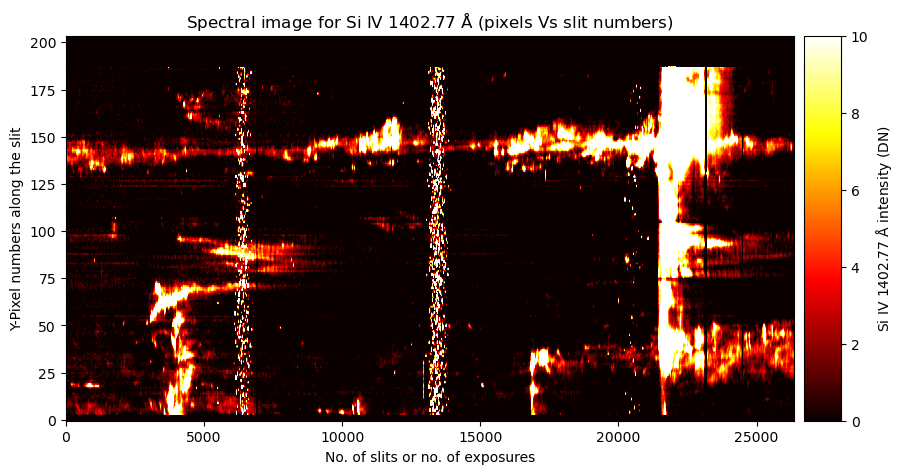

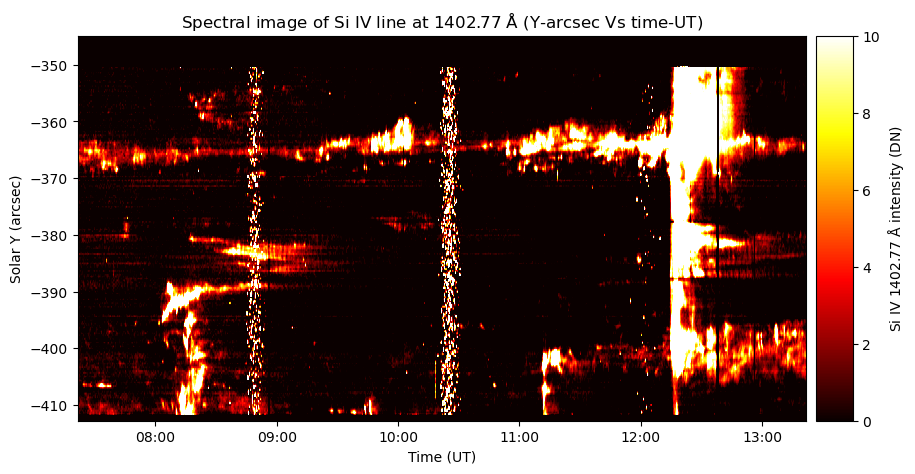

In [25]:
plt.figure(figsize=(10,5))
ax = plt.gca()
im = plt.imshow(win2_si4_sp_data[:,:,si4_1402_index].T, vmin=0, vmax=10, cmap='hot', aspect='auto') # all time, all Y , at 1 wavelength i.e. Si IV 1402.77
plt.title("Spectral image for Si IV 1402.77 $\\mathrm{\\AA}$ (pixels Vs slit numbers) ")
plt.xlabel('No. of slits or no. of exposures')
plt.ylabel('Y-Pixel numbers along the slit')
# overplot a boxed region to highlight Si IV emission
#plt.axhline(y=765, xmin=0.71, xmax=0.945, color='yellow', linewidth=4)
#plt.axhline(y=875, xmin=0.71, xmax=0.945, color='yellow', linewidth=4)
#plt.axvline(x=44.8, ymin=0.705, ymax=0.796, color='yellow', linewidth=4)
#plt.axvline(x=60, ymin=0.705, ymax=0.796, color='yellow', linewidth=4)
# colorbar
#plt.clim(0,10) # colourbar limits
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)')
plt.show()


fig, ax1 = plt.subplots(figsize=(10,5))
im=ax1.imshow(win2_si4_sp_data[:,:, si4_1402_index].T, vmin=0, vmax=10, aspect="auto", cmap='hot', extent=[times_num[0], times_num[-1], Y_arcsec[0], Y_arcsec[-1]])
ax1.xaxis_date()
date_format = dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel("Time (UT)")
ax1.set_ylabel("Solar Y (arcsec)")
ax1.set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-arcsec Vs time-UT)")
# overplot a boxed region to highlight Si IV emission
#ax1.vlines(x=times_num[45], ymin=-85,ymax= -70,color = 'yellow', linewidth=4)
#ax1.vlines(x=times_num[60], ymin=-85, ymax=-70, color = 'yellow', linewidth=4)
#ax1.hlines(y=-85, xmin=times_num[45], xmax=times_num[60], color='yellow', linewidth=4)
#ax1.hlines(y=-70, xmin=times_num[45], xmax=times_num[60], color='yellow', linewidth=4)
# colourbar
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.1)
#plt.clim(0,10) # colourbar limits

cbar = fig.colorbar(im, ax=ax1, cax=cax1, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]
plt.show()



## **Creating subplots in 1 row with 2 columns** ## 

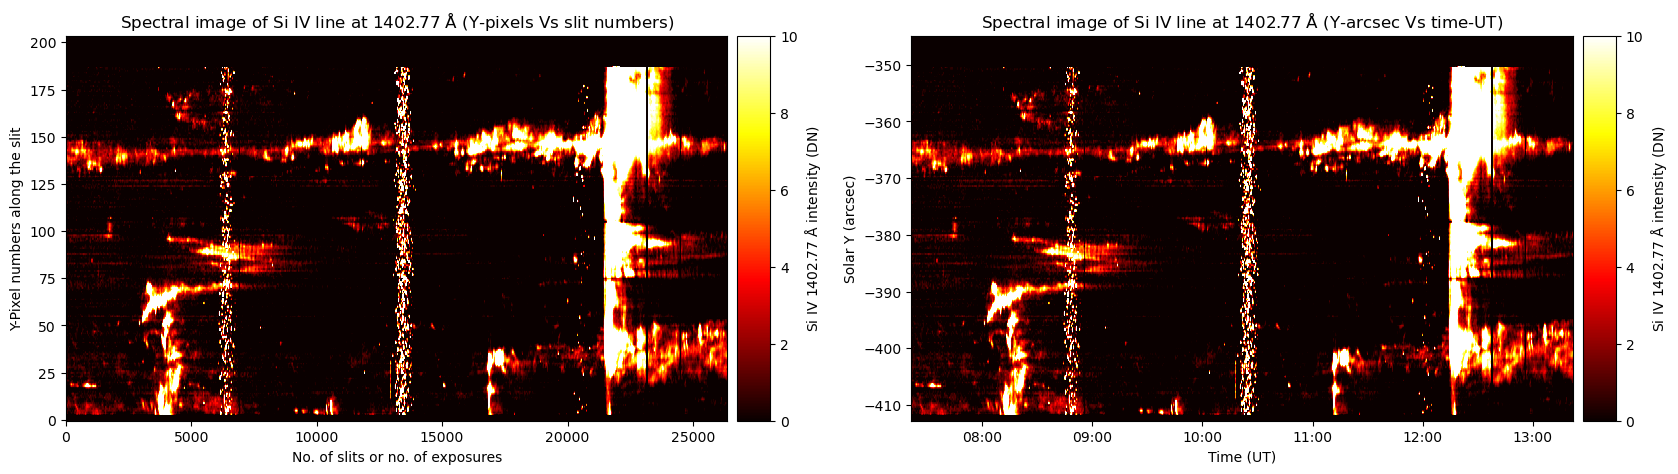

In [26]:
## plot spectral image - Y-pix Vs No. of slits
fig, axs = plt.subplots(1,2,figsize=(20,5))
im0 = axs[0].imshow(win2_si4_sp_data[:,:,si4_1402_index].T, vmin=0, vmax=10, cmap='hot', aspect='auto')
axs[0].set_xlabel("No. of slits or no. of exposures")
axs[0].set_ylabel("Y-Pixel numbers along the slit")
axs[0].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-pixels Vs slit numbers)")
# overplot a boxed region to highlight Si IV emission
#axs[0].vlines(x=45, ymin=765, ymax=845, color = 'yellow', linewidth=4)
#axs[0].vlines(x=60, ymin=765, ymax=845, color = 'yellow', linewidth=4)
#axs[0].hlines(y=765, xmin=45, xmax=60, color='yellow', linewidth=4)
#axs[0].hlines(y=845, xmin=45, xmax=60, color='yellow', linewidth=4)
# colorbar
#plt.clim(0,10) # colourbar limits
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[0])
cax0 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im0, ax=axs[0], cax=cax0, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]


## plot spectral image - Y-arcsec Vs Time-UT
im1 = axs[1].imshow(win2_si4_sp_data[:,:, si4_1402_index].T, vmin=0, vmax=10, aspect="auto", cmap='hot', extent=[times_num[0], times_num[-1], Y_arcsec[0], Y_arcsec[-1]])
axs[1].xaxis_date()
date_format = dates.DateFormatter('%H:%M')
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_xlabel("Time (UT)")
axs[1].set_ylabel("Solar Y (arcsec)")
axs[1].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-arcsec Vs time-UT)")
#axs[1].set_clim(vmin = 0, vmax = 10)
# overplot a boxed region to highlight H2 emission
#axs[1].vlines(x=times_num[45], ymin=-85,ymax= -70,color = 'yellow', linewidth=4)
#axs[1].vlines(x=times_num[60], ymin=-85, ymax=-70, color = 'yellow', linewidth=4)
#axs[1].hlines(y=-85, xmin=times_num[45], xmax=times_num[60], color='yellow', linewidth=4)
#axs[1].hlines(y=-70, xmin=times_num[45], xmax=times_num[60], color='yellow', linewidth=4)
# colourbar
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[1])
cax1 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im1, ax=axs[1], cax=cax1, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]
#plt.clim(0,10) # colourbar limits

plt.show()


## **Zoomed-in the region where Si IV 1402.77 is present** ##

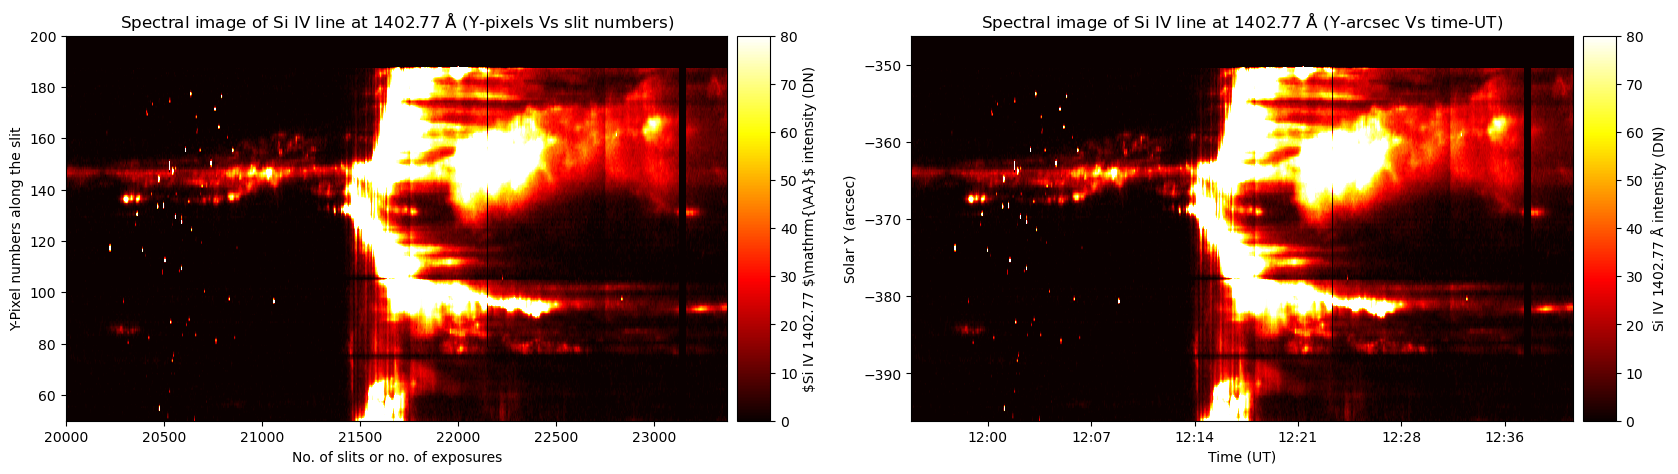

In [27]:
# plot spectral image - Y-pix Vs No. of slits
fig, axs = plt.subplots(1,2,figsize=(20,5))
x_min_range = 20000
x_max_range = 23374
y_min_range = 50
y_max_range = 200
im0 = axs[0].imshow(win2_si4_sp_data[x_min_range:x_max_range,y_min_range:y_max_range,si4_1402_index].T, vmin=0, vmax=80, cmap='hot', aspect='auto', extent = [x_min_range, x_max_range, y_min_range, y_max_range])
axs[0].set_xlabel("No. of slits or no. of exposures")
axs[0].set_ylabel("Y-Pixel numbers along the slit")
axs[0].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-pixels Vs slit numbers)")
# colorbar
#plt.clim(0,10) # colourbar limits
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[0])
cax0 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im0, ax=axs[0], cax=cax0, label = '$Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]

## plot spectral image - Y-arcsec Vs Time-UT
im1 = axs[1].imshow(win2_si4_sp_data[x_min_range:x_max_range,y_min_range:y_max_range,si4_1402_index].T, vmin=0, vmax=80, aspect="auto", cmap='hot', extent=[times_num[x_min_range], times_num[x_max_range], Y_arcsec[y_min_range], Y_arcsec[y_max_range]])
date_format = dates.DateFormatter('%H:%M')
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_xlabel("Time (UT)")
axs[1].set_ylabel("Solar Y (arcsec)")
axs[1].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-arcsec Vs time-UT)")
#colourbar
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[1])
cax1 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im1, ax=axs[1], cax=cax1, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]
#plt.clim(0,10) # colourbar limits
plt.show()


## **Zoomed-in the region where Si IV 1402.77 is present** ##

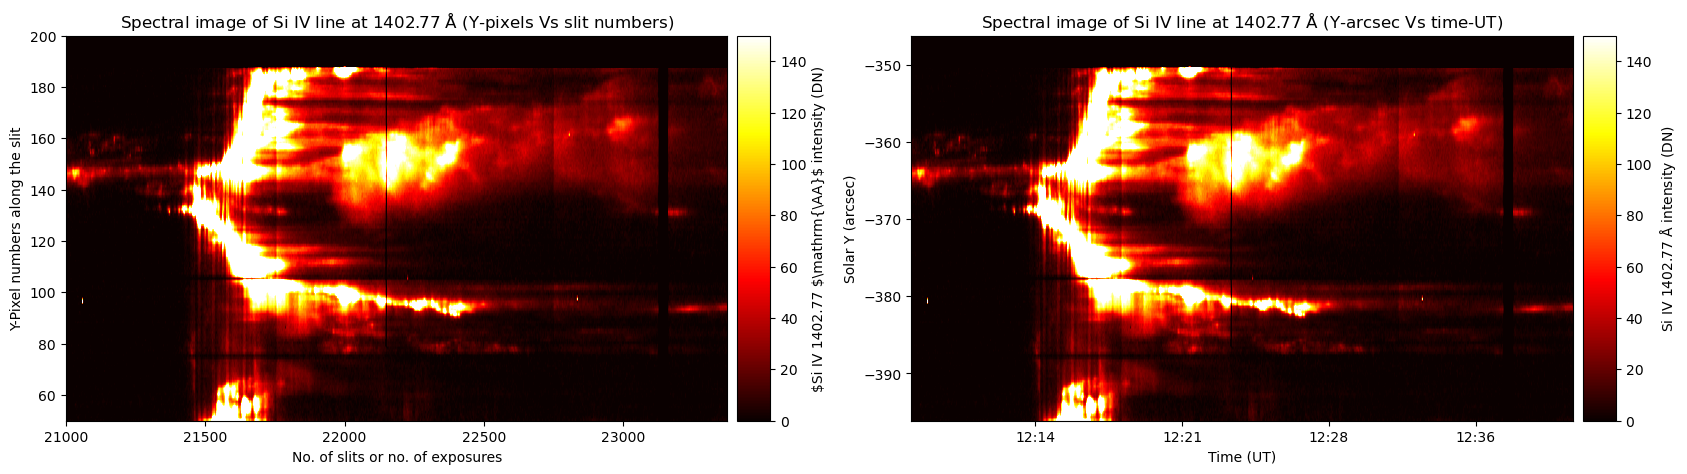

In [28]:
# plot spectral image - Y-pix Vs No. of slits
fig, axs = plt.subplots(1,2,figsize=(20,5))
x_min_range = 21000
x_max_range = 23374
y_min_range = 50
y_max_range = 200
im0 = axs[0].imshow(win2_si4_sp_data[x_min_range:x_max_range,y_min_range:y_max_range,si4_1402_index].T, vmin=0, vmax=150, cmap='hot', aspect='auto', extent = [x_min_range, x_max_range, y_min_range, y_max_range])
axs[0].set_xlabel("No. of slits or no. of exposures")
axs[0].set_ylabel("Y-Pixel numbers along the slit")
axs[0].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-pixels Vs slit numbers)")
# colorbar
#plt.clim(0,10) # colourbar limits
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[0])
cax0 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im0, ax=axs[0], cax=cax0, label = '$Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]

## plot spectral image - Y-arcsec Vs Time-UT
im1 = axs[1].imshow(win2_si4_sp_data[x_min_range:x_max_range,y_min_range:y_max_range,si4_1402_index].T, vmin=0, vmax=150, aspect="auto", cmap='hot', extent=[times_num[x_min_range], times_num[x_max_range], Y_arcsec[y_min_range], Y_arcsec[y_max_range]])
date_format = dates.DateFormatter('%H:%M')
axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_xlabel("Time (UT)")
axs[1].set_ylabel("Solar Y (arcsec)")
axs[1].set_title("Spectral image of Si IV line at 1402.77 $\\mathrm{\\AA}$ (Y-arcsec Vs time-UT)")
#colourbar
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axs[1])
cax1 = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im1, ax=axs[1], cax=cax1, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)') #, ticks=[0,2,4,6,8,10]
#plt.clim(0,10) # colourbar limits
plt.show()


## **Get the time for slits where Si IV was observed** ##

In [29]:
# get the time for slit 52
print('time for slit 2000-3500 = ',times[21000:23374])

# get the 

time for slit 2000-3500 =  ['2024-10-03T12:08:19.528' '2024-10-03T12:08:20.528'
 '2024-10-03T12:08:21.528' ... '2024-10-03T12:40:42.528'
 '2024-10-03T12:40:43.528' '2024-10-03T12:40:44.528']


## **Displaying spectrum at 1-slit position at 1 pixel for two Si IV lines at 1402.77 Å** ##

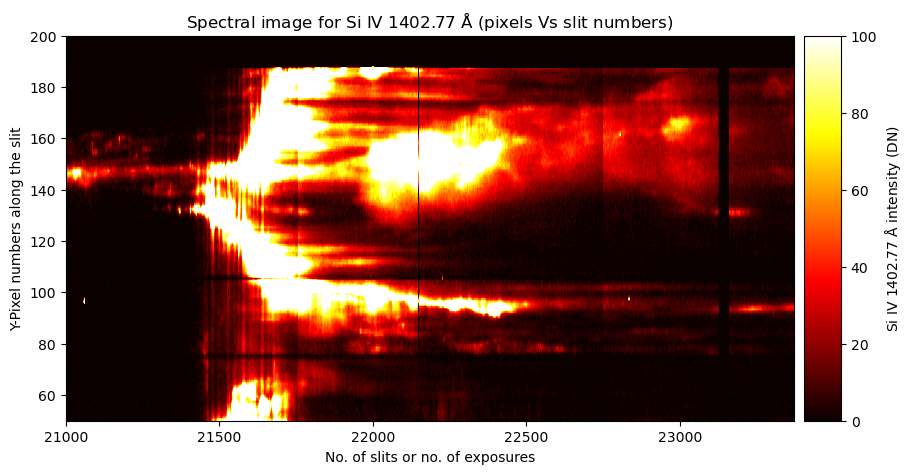

247
1400.20822787
1406.4664678694096
win2_si4_wavelength_start =  0
win2_si4_wavelength_end =  246


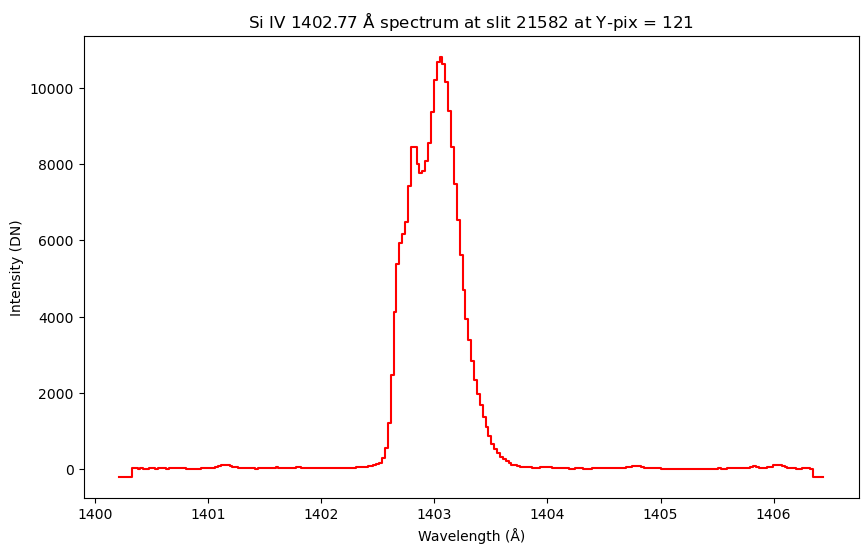

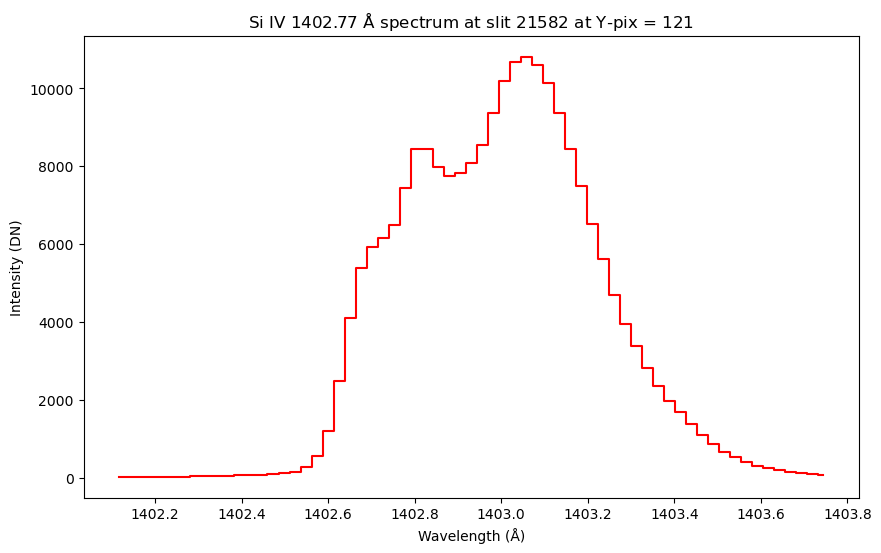

In [31]:
# Display the spectral image at Si IV 1402.77 Angstrom
plt.figure(figsize=(10,5))
ax = plt.gca()
im = plt.imshow(win2_si4_sp_data[x_min_range:x_max_range,y_min_range:y_max_range,si4_1402_index].T, vmin=0, vmax=100, cmap='hot', aspect='auto', extent = [x_min_range, x_max_range, y_min_range, y_max_range]) # all time, all Y , at 1 wavelength i.e. H2 1333.797
plt.title("Spectral image for Si IV 1402.77 $\\mathrm{\\AA}$ (pixels Vs slit numbers) ")
plt.xlabel('No. of slits or no. of exposures')
plt.ylabel('Y-Pixel numbers along the slit')
# colorbar
#plt.clim(0,10) # colourbar limits
# adjust colobar size and location
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label = 'Si IV 1402.77 $\\mathrm{\\AA}$ intensity (DN)')
plt.show()

print(len(win2_si4_wavelength))
print(win2_si4_wavelength[0])
print(win2_si4_wavelength[246])

win2_si4_wavelength_start = 0
win2_si4_wavelength_end = 246
print('win2_si4_wavelength_start = ', win2_si4_wavelength_start)
print('win2_si4_wavelength_end = ', win2_si4_wavelength_end)

slit_no = 21582
y_pix = 121

# plot spectrum for Si IV lines at 1402.77 at signle slit position
plt.plot(win2_si4_wavelength[win2_si4_wavelength_start:win2_si4_wavelength_end], win2_si4_sp_data[slit_no,y_pix,win2_si4_wavelength_start:win2_si4_wavelength_end], color = 'r', ds ='steps-mid')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Intensity (DN)')
plt.title('Si IV 1402.77 $\\mathrm{\\AA}$ spectrum at slit 21582 at Y-pix = 121')
plt.show()

plt.plot(win2_si4_wavelength[75:140], win2_si4_sp_data[slit_no,y_pix,75:140], color = 'r', ds ='steps-mid')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Intensity (DN)')
plt.title('Si IV 1402.77 $\\mathrm{\\AA}$ spectrum at slit 21582 at Y-pix = 121')
plt.show()
